In [1]:
import json
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
with open("20211202_1826_exposure_-10.json", "r") as st_json:
    data = json.load(st_json)

In [8]:
from IPython.display import clear_output
from random import randint
import numpy as np
import os

save_dict = {}
save_list = []

keys = list(data.keys())
flag = False


with open("crop_data.txt", 'w') as fp:
    for key in keys[:]:
        bboxes = data[key]
        img = cv2.imread(key)
        # img = cv2.resize(img, dsize=(480,270))
        print(key, end='\r')

        if "tomatoe_redkiwi_goldkiwi" in key:
            continue
        if "mature_tomatoe_1kg" in key:
            continue
        
        bboxes = np.array(bboxes)
        flag = False
        try:
            # print(bboxes)
            # print(len(bboxes))
            if len(bboxes) == 0:
                continue
            for bidx, bb in enumerate(bboxes):
                min_h = bb[0][1]

                if any(bb[:,0] < 5) == True or\
                    any(bb[:,0] > 3835) == True or\
                    any(bb[:,1] < 5) == True or\
                    any(bb[:,1] > 2155) == True:
                        flag = True
                        break
                        # pass
                min_h, max_h, min_w, max_w = bb[0][1], bb[2][1], bb[1][0], bb[3][0]

                pad_up, pad_bottom, pad_left, pad_right = randint(20, 100), randint(20, 100), randint(20, 100), randint(20, 100)


                min_h_ = max(0, min_h-pad_up)
                max_h_ = min(2159, max_h+pad_bottom)
                min_w_ = max(0, min_w-pad_left)
                max_w_ = min(3839, max_w+pad_right)
                cropped_img = img[min_h_:max_h_, min_w_:max_w_]
                # Image.fromarray(cropped_img).show()
                # plt.imshow(cropped_img)
                # plt.show()

                new_bb = np.zeros(bb.shape)
                new_bb[:,0] = bb[:,0] - min_w_
                new_bb[:,1] = bb[:,1] - min_h_

                new_bb = new_bb.astype(np.uint16)

#                 bbox = new_bb[0]
#                 cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,0,0) , 20)
#                 bbox = new_bb[1]
#                 cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,127,0) , 20)
#                 bbox = new_bb[2]
#                 cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,255,0) , 20)
#                 bbox = new_bb[3]
#                 cv2.line(cropped_img, tuple(bbox), tuple(bbox), (0,255,0) , 20)

#                 plt.imshow(cropped_img)
#                 plt.show()
                save_path = os.path.join(os.getcwd(),'cropped_img', key.split('/home/ubuntu/korean_ocr/data/original/')[1][:-4]+'_'+str(bidx)+'.png')
                os.makedirs(os.path.dirname(save_path),exist_ok=True)

                cv2.imwrite(save_path, cropped_img)
                fp.write(str({'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()})+'\n')

            if flag:
                continue
        except Exception as e :
            # print(bboxes)
            print(e)
            continue


In [218]:
save_path = os.path.join(os.getcwd(),'cropped_img', key.split('/home/ubuntu/korean_ocr/data/original/')[1][:-4]+'_'+str(bidx)+'.png')
os.makedirs(os.path.dirname(save_path),exist_ok=True)
# key

'/home/ubuntu/workspace/dot_detection/cropped_img/munogyak_goldkiwi_1kg'

In [206]:
with open("crop_data.txt", 'w') as fp:

    bidx=0
    save_path = os.path.join(os.getcwd(),'cropped_img', os.path.basename(key)[:-4]+'_'+str(bidx)+'.png')

    fp.write(str({'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()})+'\n')
    fp.write(str({'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()})+'\n')
    fp.write(str({'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()})+'\n')

297

In [201]:
json.dump(list_data, fp)

In [198]:
with open("crop_data.json", "r") as st_json:
    data_st = json.load(st_json)

In [200]:
list_data = [{'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()}, {'img_path':key, 'box':bb.tolist(), 'cropped_img_path':save_path, 'cropped_box':new_bb.tolist()}]

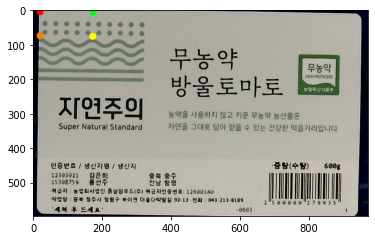

[[1718  956]
 [1718 1537]
 [2639 1539]
 [2640  957]]
1698 951


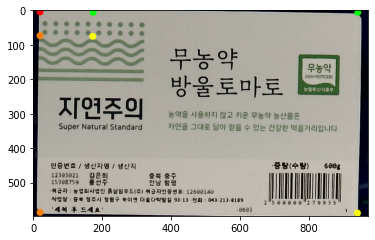

array([[ 20,   5],
       [ 20, 586],
       [941, 588],
       [942,   6]], dtype=uint16)

In [178]:
min_h, max_h, min_w, max_w = bb[0][1], bb[2][1], bb[1][0], bb[3][0]

pad_up, pad_bottom, pad_left, pad_right = randint(0, 50), randint(0, 50), randint(0, 50), randint(0, 50)

min_h_ = max(0, min_h-pad_up)
max_h_ = min(2159, max_h+pad_bottom)
min_w_ = max(0, min_w-pad_left)
max_w_ = min(3839, max_w+pad_right)
cropped_img = img[min_h_:max_h_, min_w_:max_w_]

plt.imshow(cropped_img)
plt.show()

print(bb)
print(min_w_, min_h_)

new_bb = np.zeros(bb.shape)
new_bb[:,0] = bb[:,0] - min_w_
new_bb[:,1] = bb[:,1] - min_h_

new_bb = new_bb.astype(np.uint16)

bbox = new_bb[0]
cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,0,0) , 20)
bbox = new_bb[1]
cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,127,0) , 20)
bbox = new_bb[2]
cv2.line(cropped_img, tuple(bbox), tuple(bbox), (255,255,0) , 20)
bbox = new_bb[3]
cv2.line(cropped_img, tuple(bbox), tuple(bbox), (0,255,0) , 20)

plt.imshow(cropped_img)
plt.show()
new_bb

In [177]:
bb[:,0] - min_w_
bb[:,1] - min_h_

array([ 10, 591, 593,  11])

In [82]:
with open('data.json', 'a') as fp:
    json.dump(save_dict, fp)

In [77]:
save_dict

{'/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0026.png': [[[2276,
    -339],
   [1808, 341],
   [2303, 680],
   [2771, 0]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0027.png': [[[2373,
    -339],
   [1810, 480],
   [2305, 820],
   [2868, 0]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0028.png': [[[2415,
    -214],
   [1817, 670],
   [2314, 1006],
   [2912, 121]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0029.png': [[[2476,
    -40],
   [1824, 840],
   [2298, 1191],
   [2950, 310]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0030.png': [[[2456,
    169],
   [1818, 1085],
   [2301, 1421],
   [2938, 504]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0031.png': [[[2461,
    352],
   [1822, 1268],
   [2305, 1605],
   [2943, 689]]],
 '/home/ubuntu/korean_ocr/data/original/munogyak_goldkiwi_1kg/0032.png': [[[2468,
    539],
   [1828, 1452],
   [2307, 1787],
   [2946, 873]]],

In [27]:
img.shape

(2160, 3840, 3)

In [34]:
3840/8

480.0

In [35]:
2160/8

270.0